# **Bipolar disorder - Brain map fMRI data**

## *Home assignment - Programming for Psychologists - 2024/2025*

**Name:** Siri Onshuus Kågen

**Date:** 15/12/2024

**Student number:** 2860899 

**Data source:** [https://neurosynth.org/analyses/terms/bipolar/]
<br/>

### *Description*
The data I have chosen is from a term-based meta-analysis on 157 studies where the key term is bipolar disorder. Originally I hoped to do a comparison of one meta-analysis baseed on 130 studies, and the following meta-analysis on 157 studies. However, I did not have time for everything in the end, but the traces of my fanatasy are left behind. AKA the unneccessary add-on of "157" here and there. The numbers carry no significance past a reek of grappling passion for fancy 0s & 1s, and time-blind enthusiasm. I chose to both visualize the association data and the uniformity data, for my own curiosity, but also to showcase the difference in these types of data. Below I have included an explaination of the association test map and uniformity test map from the same source I acquired these data sets. 

## **Step 1: Import neccessary libraries**

In [22]:
import os
import nibabel as nib
import nilearn.plotting as plotting
from nilearn.plotting import plot_stat_map
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import scipy as scipy
from scipy.optimize import curve_fit



## **Step 2: Locate and load data files**

First we need to locate the data files we intend to process. Since the data is in it's own folder within the repository, we can just use a `relative folder path` directly to the folder. We can do this by assigning the relative folder path to an outut variable of our choice (i.e folder_path). No need to adjust the path when forking the repository. 

Then we want to use the function `os.listdir()`, which returns the list of data files as strings in the specified directory (folder_path) and assigns them to the output variable (files). If we didn't use this function, we would have to manually specify every file in the directory, which is impractical for directories with many files. 

However, when we call on the data, we (usually) want to access specific files at a time, and not all the files in the directory simultaneously. Therefore we are going to assign specific files to variables with names of our choosing, using the following statement: 

`variable = next(f for f in files if "substring" in f and f.endswith('currentfilename.nii'))`

Here f represents the current file name being checked. The expression "f for f in files" ensures each file in the "files" list are checked, one at a time. 
The next() function retrieves the first file name from the generator expression that satisfied both conditions (which are combined using `and` operator):
1. `"substring" in f` = checks if a substring (i.e part of the name of the data file) exists in the current file name. Like searching for a document on your computer using a key word/ search word, rather than the full name. 
   
2. `f.endswith ('currentfilename.nii')` = checks if the file name ends with the specific string 

If both conditions are met, the matching file is assigned to the variable. 


In [23]:
# Locate files automatically
folder_path = 'fMRI files/157 studies' #Relative folder path
files = os.listdir(folder_path) 

anatomical_file = next(f for f in files if "anatomical" in f and f.endswith('anatomical_157.nii'))
functional_file = next(f for f in files if "uniformity" in f and f.endswith('uniformity_157.nii'))
functional_file2 = next(f for f in files if "association" in f and f.endswith('association_157.nii'))

print("Anatomical file:", anatomical_file)
print("Functional file:", functional_file)
print("Functional file 2:", functional_file2)


Anatomical file: anatomical_157.nii
Functional file: uniformity_157.nii
Functional file 2: association_157.nii


### Create plottable cross-platform compatable file paths

Before we can plot our data however, we need to combine the folder path and file name into a full file path, which can be done with the function `os.path.join()`. So far we only have variables that correspond to the following strings:
* `folder_path`: a string that represents the path to the folder containing the data files
  
* (i.e `anatomical_file`): a string that represents the name of a file in the folder (`anatomical_157.nii`)

While it is possible to plot data from the files without `os.path.join()`, that solution is less portable, and you run a higher risk of errors and issues if attempting to to run the code on different operating systems. You would also have to manually create the file path yourself when creating the plot, which is a lot of extra work and potential debugging if you intend to plot large amounts of data. 

In [24]:
anatomical_path = os.path.join(folder_path, anatomical_file)
functional_path = os.path.join(folder_path, functional_file)
functional_path2 = os.path.join(folder_path, functional_file2)

## **Step 3: Visualize brain map**

There are several ways to visualize the brain map, especially since I have chosen to include 2 functional data files to be visualized. So I have chosen to include the 3 versions I built on, and you can pick the one you prefer.
1. Overlay
2. Simple subplot
3. Detailed subplot

When visualizing the brain map, we will plot the functional data (corresponds to either uniformity or association data) on top of the anatomical data (which essentially plots an image of the anatomical brain at the specified coordinates). For this we will use the function `plot_stat_map` from nilearn (a library used to visualize and process brain iamging data). The function `plot_stat_map()` visualizes statistical maps on top of anatomical brain images. When we construct the brain map, there are a few parameters to keep in mind:

* We use the parameter `bg_img` to define which file we want to use for the anatomical brain image. However, if you don't specify one yourself, nilearn will automatically use a standard brain template.
  
* The parameter `cut_coords` provides nilearn with the (X, Y, Z) values that corresponds to coordinates in the anatomical brain map, which we see as "the slices" of the brain. 
  
* Since we want to display two functional data files on top of our anatomical file, we use the functions `display()` and `display.add_overlap()` to first plot one functional data file on top of the anatomical scan, before plotting the second functional data file on top as an overlay.

Note: since we are coding in an interactive environment (Jupyter Notebooks), we do not need to call `plotting.show()` at the end of our code. This is because the interactive environment detects when to display visual outputs. However, in Non-Interacctive Environments (like Python Scripts), calling `plotting.show()` is neccessary to display the plot. Therefore, for the sake of reproducability outside of the interactive environment, it might be useful to include the call at the end of your code. As well as to ensure any changes you made following the initial rendering of the figure, are actually rendered as well.

### **Visualize brain map - Alternative 1 (overlay)**

/Users/sirikagen/miniconda3/envs/fmri_env/lib/python3.12/site-packages/numpy/ma/core.py:2881: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


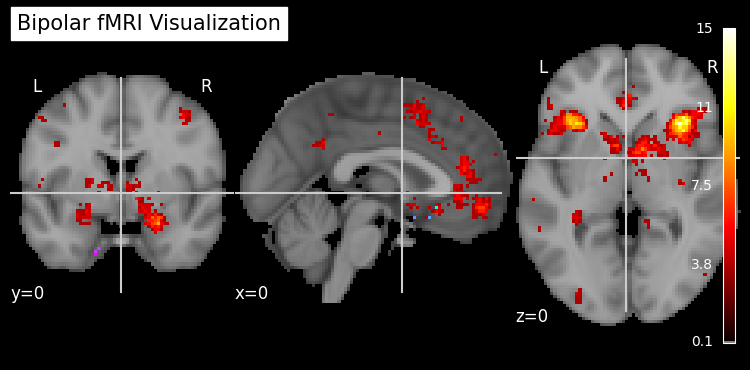

In [32]:
# Plot the functional data on top of the anatomical scan
display = plotting.plot_stat_map(
    functional_path, 
    bg_img=anatomical_path, #bg_img is the background brain image, in this case the anatomical file
    title="Bipolar fMRI Visualization",
    threshold=0.1,  # Exclude low values
    display_mode='ortho',  # Orthogonal view
    cut_coords=(0, 0, 0),  # Displays the center of the
    cmap="hot"  # A gradient colormap for the functional data, which assigns a color to each data point, depending on its value
)

# Overlay the second functional dataset
display.add_overlay(
    functional_path2,
    cmap="cool",  # Different colormap for the second dataset
    threshold=0.1,  # Same threshold to maintain consistency
    alpha= 1  # Transparency for the overlay
)

plotting.show()

### **Visualize brain map - Alternative 2 (subplots)**

One problem we face with overlaying functional data like above, is if the two data sets have little to no overlay in location of high activity. 

In that case, we can plot the brain map with the two functional data sets as subplots of a figure `fig, axes = plt.subplots(rows, columns)`, which allows us to see them side by side. We can alter and plot the number of rows and columns by replacing the corresponding text above with the desired number. The axes parameter refers to individual axes (or sublots) in the figure, and by specifying this parameter for each subplot, you can assign their possition in the figure.

Since we are opting for a figure with subpolts, we do not need to utilize the `display` function.

/var/folders/yg/5st2rqtj1fj_p5lyc22p30d80000gn/T/ipykernel_37573/493017197.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout() # Automatically adjusts the position of the the subplots and other elements in the figure to ensure they fit within the figure area and do not overlap.


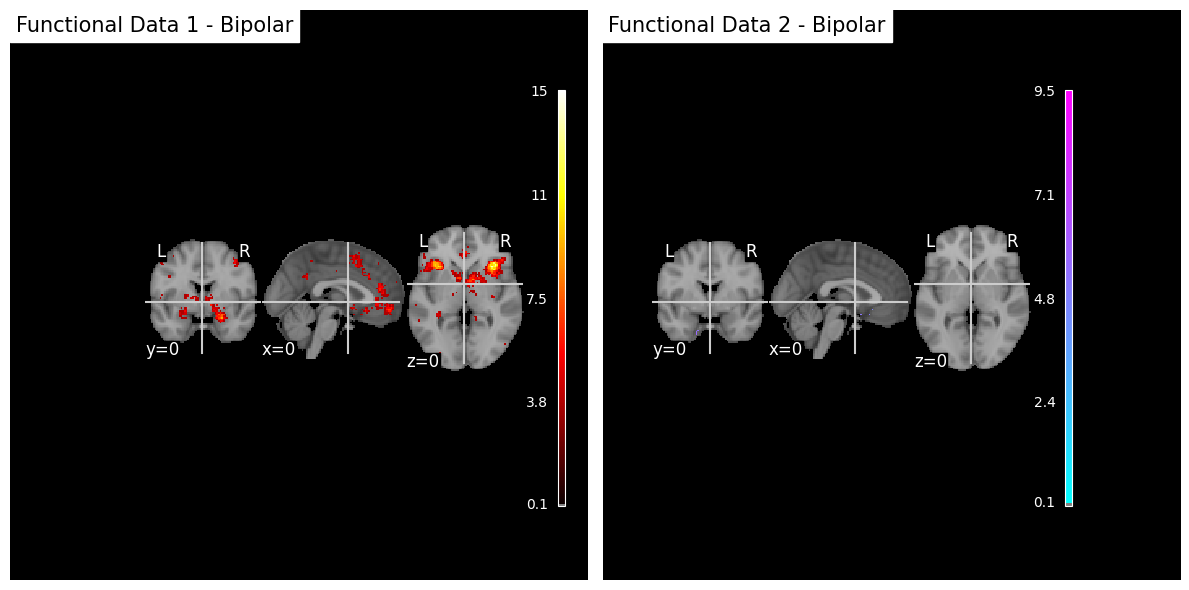

In [34]:
# Create a figure for side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) #figure size is 12x6 inches (width x height)

# Plot the first functional dataset
plotting.plot_stat_map(
    functional_path,
    bg_img=anatomical_path,
    title="Functional Data 1 - Bipolar",
    threshold=0.1,
    display_mode='ortho',
    cut_coords=(0, 0, 0),
    cmap="hot",
    axes=axes[0],  # Place in the first subplot
    colorbar=True  # Include colorbar
)

# Plot the second functional dataset
plotting.plot_stat_map(
    functional_path2,
    bg_img=anatomical_path,
    title="Functional Data 2 - Bipolar",
    threshold=0.1, 
    display_mode='ortho',
    cut_coords=(0, 0, 0),
    cmap="cool",
    axes=axes[1],  # Place in the second subplot
    colorbar=True  # Include colorbar
)


# Adjust layout and save the figure
plt.tight_layout() # Automatically adjusts the position of the the subplots and other elements in the figure to ensure they fit within the figure area and do not overlap. 
plt.show() # Call the figure to display it, and the subplots within it


### Do we see this as an improvement to the previous visualization?

Okay, so the creation of a subplot made it easier to see where there is room for imporvement. 
* The color bar doesn't stretch out on it's own if we only expand the figure, as it has a set distance from the brain images. (I played around with this parameter earlier, so the conclusion is not based solely on the image and code above).

* The color bars are larger than the brain images themselves, and warps the entire presentation of the figure. 

* We didn't change the coordinates (X, Y, Z) for the association data (functional data 2). But even if we had, we can tell from the uniformity data (functional data 1) that the highest level of activity at one coordinate, is probably not mirrored at the other coordinates, even within the same data set.

* The coronal, axial and sagittal slices of the brain map are awfully close to each other, and the spacing seems pre-determined (another thing I attemped to change for some time, before I realised it wasn't possible to add space between them). 

* There is no place where it is clarified what y, x or z corresponds to in terms of sagittal, axial and coronal view. 

* The titles are just straight up aesthetically displeasing. Vomit-inducing even.


### **Visualize data - Alternative 3 (detailed subplots)**

Especially recommended for those who need to read for their exams, but procrastination tastes so yummy when it is wrapped in a veil of productiveness. There are a variety of aesthetic changes you can apply to your brain map, both for the sake of your own sanity as well as readability. 

All new changes are explained in the code itself.

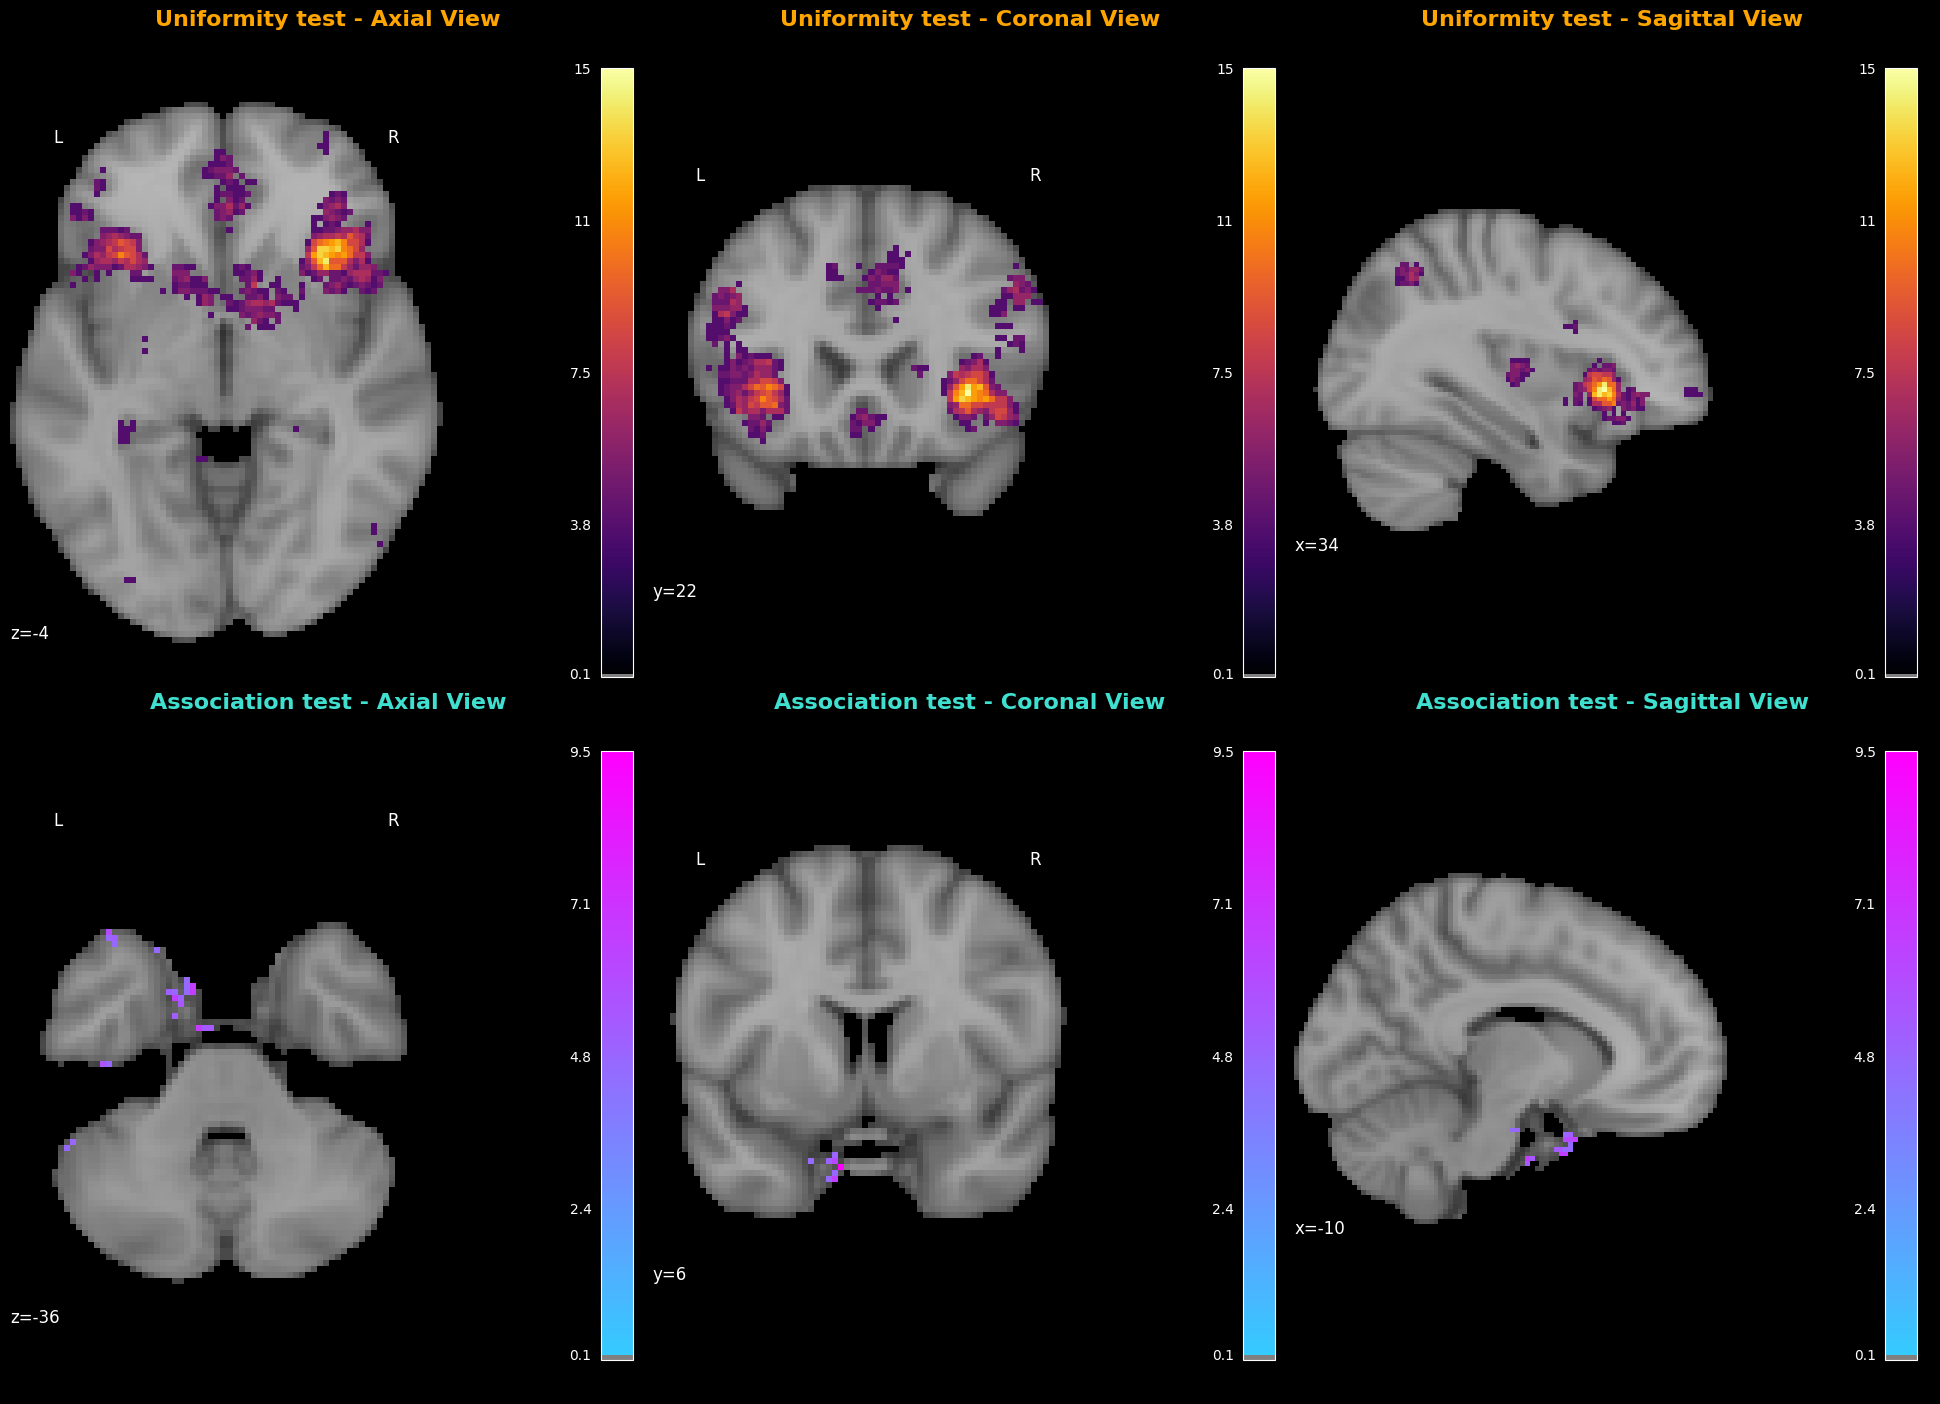

In [35]:
# Create a 2x3 grid of subplots (2 rows and 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(24, 17))  # Increase figure size to fit all 6 plots

# Adjust the spacing between the subplots
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.01, wspace=0.01) 

# Set the background color of the figure to black, to avoid the white gaps in between the subplots
fig.patch.set_facecolor('black')

# Create a brighter version of the colormap, since the values are not as intense as the first dataset

cool_colormap = plt.cm.cool # Define the colormap that is to be modified 
brighter_cool_colormap = mcolors.LinearSegmentedColormap.from_list(
    "bright_cool", 
    cool_colormap(np.linspace(0.2, 1, 256))
    ) 

# Define title properties for uniformity and association tests (separately)
title_props_uniformity = {
    'fontsize': 16,
    'color': 'orange',
    'backgroundcolor': 'black',
    'fontweight': 'bold'
    }

title_props_association = {
    'fontsize': 16,
    'color': 'turquoise',
    'backgroundcolor': 'black',
    'fontweight': 'bold'
    }

# Axial view (z-axis cuts) with Functional Data 1
plotting.plot_stat_map(
    functional_path,  # First functional data
    bg_img=anatomical_path,  # Anatomical scan
    threshold=0.1,
    display_mode='z',  # 'z' corresponds to axial
    cut_coords=(-4,),  # Coordinate cut for the axial view (z-axis)
    cmap="inferno",  # First dataset colormap
    alpha=1,  
    axes=axes[0, 0],  # First subplot (top-left)
    colorbar=True  
)
axes[0, 0].set_title("Uniformity test - Axial View", **title_props_uniformity) # Set title with custom properties for uniformity data

# Axial view (z-axis cuts) with Functional Data 2
plotting.plot_stat_map(
    functional_path2,  # Second functional data
    bg_img=anatomical_path,  # Anatomical scan
    threshold=0.1,
    display_mode='z',  # Same axial view
    cut_coords=(-36,),  # Coordinate cut for the axial view (z-axis)
    cmap=brighter_cool_colormap,  # Second dataset colormap
    alpha=1,  
    axes=axes[1, 0],  # Second subplot (bottom-left)
    colorbar=True 
)
axes[1, 0].set_title("Association test - Axial View", **title_props_association) # Set title with custom properties for association data

# Coronal view (y-axis cuts) with Functional Data 1
plotting.plot_stat_map(
    functional_path,
    bg_img=anatomical_path,
    threshold=0.1,
    display_mode='y',  # 'y' corresponds to coronal
    cut_coords=(22,),  # Coordinate cut for the coronal view (y-axis)
    cmap="inferno",
    alpha=1,
    axes=axes[0, 1],  # First subplot in second column (top-center)
    colorbar=True
)
axes[0, 1].set_title("Uniformity test - Coronal View", **title_props_uniformity)

# Coronal view (y-axis cuts) with Functional Data 2
plotting.plot_stat_map(
    functional_path2,
    bg_img=anatomical_path,
    threshold=0.1,
    display_mode='y',  # Same coronal view
    cut_coords=(6,),  # Coordinate cut for the coronal view (y-axis)
    cmap=brighter_cool_colormap,
    alpha=1,
    axes=axes[1, 1],  # Second subplot in second column (bottom-center)
    colorbar=True
)
axes[1, 1].set_title("Association test - Coronal View", **title_props_association)

# Sagittal view (x-axis cuts) with Functional Data 1
plotting.plot_stat_map(
    functional_path,
    bg_img=anatomical_path,
    threshold=0.1,
    display_mode='x',  # 'x' corresponds to sagittal
    cut_coords=(34,),  # Coordinate cut for the sagittal view (x-axis)
    cmap="inferno",
    alpha=1,
    axes=axes[0, 2],  # First subplot in third column (top-right)
    colorbar=True
)
axes[0, 2].set_title("Uniformity test - Sagittal View", **title_props_uniformity)

# Sagittal view (x-axis cuts) with Functional Data 2
plotting.plot_stat_map(
    functional_path2,
    bg_img=anatomical_path,
    threshold=0.1,
    display_mode='x',  # Same sagittal view
    cut_coords=(-10, ),  # Coordinate cut for the sagittal view (x-axis)
    cmap=brighter_cool_colormap,
    alpha=1,
    axes=axes[1, 2],  # Second subplot in third column (bottom-right)
    colorbar=True,
)
axes[1, 2].set_title("Association test - Sagittal View", **title_props_association)

plt.show()


## **Step 4: Plot a histogram**

As with the visualization of the fMRI data, I have included 3 increasinly more detailed histograms, with each "upgrade" aiming to improve readability of the histogram, while increasing visual correlation to the fMRI visualizations above.

1. Bare minimum histogram 
2. Simple histogram + fitted curve & mean value point
3. Detailed histogram

However, before we can plot the data, we need to convert it into a format that can be manipulated in functions from data visualization libraries such as `matplotlib`. Neuroimaging data is often stored as 3D or 4D arrays, but data visualization libraries typically require the data to be in a 1D array. One such way, is using nibabel. 

Nibabel is a Python library used for reading and writing neuroimaging data. From this library we can borrow the function `nib.load()`. This function loads neuroimaging data from a file, and returns an object containing the image data in a visualizable and manipulatable format (typically NumPy array). 

Since we want to look at association and uniformity values for various brain areas positively associated with bipolar disorder, it would not make sense to include negative or 0 values. A 0 value would indicate no association, and while negative values are unlikely (considering the type of data), we want to use only the positive values above 0. This is done by extracting the positive values from the NumPy array created by `nib.load()` function.

In [36]:
# Load functional data
functional_data = nib.load(functional_path).get_fdata() #get_fdata() method returns the data as a numpy array
functional_data2 = nib.load(functional_path2).get_fdata()

# Extract positive values
positive_values = functional_data[functional_data > 0]
positive_values2 = functional_data2[functional_data2 > 0]

### **Plot histogram - Alternative 1 (bare minimum)**

I will judge you if you prefer this one.

Nevertheless, the following histogram visualizes the uniformity / association values on the x-axis and their respective (reported) frequencies on the y-axis. The frequency corresponds to how often the value has been reported, and not how "strongly" associated a brain area is with bipolar disorder. It allows for an intepretation on whether bipolar disorder is associated with specific brain areas, or a wider range of brain areas. It also gives an insight into whether the majority of the studies that mention bipolar disorder, focuses on brain regions with a strong or low association. 

When constructing the histogram, a paramter named `bins` is less self-explanatory than the rest. This parameter specifies the number of intervals (bins) that the x-axis data is grouped into. The higher the number, the more specific (and narrower) the intervals become. The same goes the other way; the lower the number, the more unspecific to a single value, and generalized the intervals become. A higher number of bins might be more useful for large datasets, to detect subtle patterns. Meanwhile a lower number might be more beneficial in small datasets (to avoid over-interpretation), or to easier spot a general pattern. 

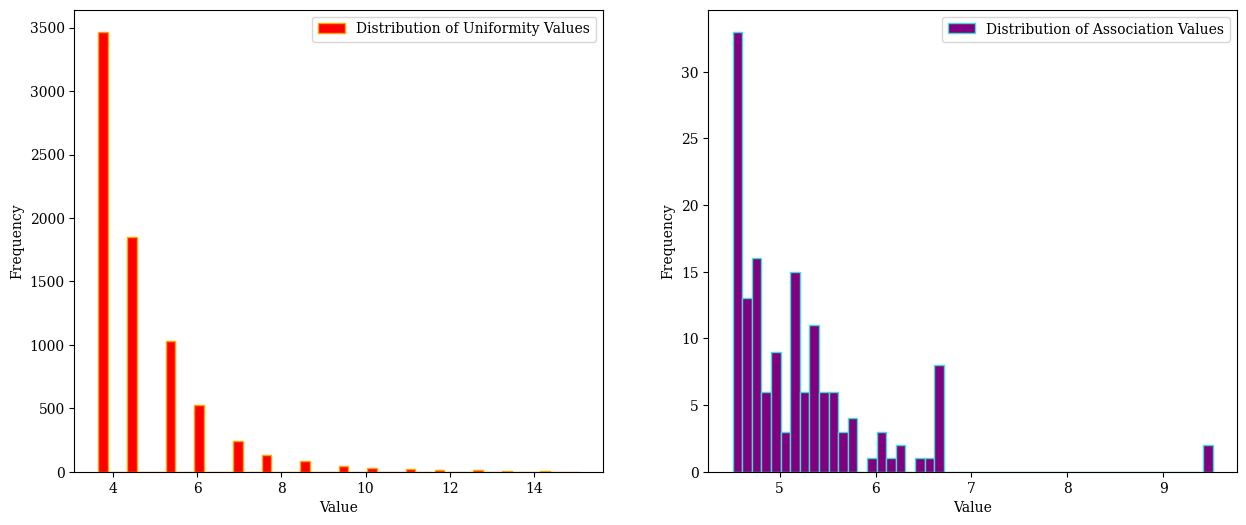

In [9]:
# Set up the figure dimensions
plt.figure(figsize=(15, 6))

# Set global font properties
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'font.weight': 'normal',
    'text.color': 'black'
})

# Plot the first histogram - Distribution of Uniformity Values
plt.subplot(1, 2, 1)
plt.hist(
    positive_values, 
    bins=50, 
    color='red', 
    edgecolor='orange', 
    label='Distribution of Uniformity Values'
)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Plot the second histogram - Distribution of Association Values
plt.subplot(1, 2, 2)
plt.hist(
    positive_values2, 
    bins=50, 
    color='purple', 
    edgecolor='turquoise', 
    label='Distribution of Association Values'
)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Show the plots
plt.show()


### **Plot histogram - Alternative 2 (mean data point + fitted curve + y-values on top of bins)**

It doesn't provide much more info than the one above, and it is still a bit hard to see how it correlates to the brain fMRI images. But it may grant you the ability to flex on your fellow students who still crawl around in their python diapers. 

Here you calculate a fitted curve that corresponds to the exponential decay of the data, based on the midpoints of the bins on your x-axis and an optimizing function (*popt). Then you calculate the mean of both your x-values and y-values, and plot a single data point with these values as coordinates (can be down manually or by `np.mean`). At last you annotate the y-values on top of the correspending bins

There are a few new parameters and functions to bring attention to in this histogram:
* `counts` = An array that shows the number of data points that fall into each bin

* `patches` = Objects that represent 2D shapes. In a histogram, individual bars are represented as "rectangle" patches. Can be modified for visualization, such as set_facecolor() and set_edgecolor().

* `bin_centers` = represent the midpoints of the bins (derived from the bin edges) and provide a single x-coordinate for each bin.

* `curve_fit` = a function that takes arrays of x and y data points + a model function to fit to the data, and returns an output that is the optimized parameters of the function.

* `np.arrange` = generates an evenly spaced array of values within a specified range

* `*popt` = refers to the array of optimized parameters returned by functions such as scipy.optimize.curve_fit

* `plt.gca` = "get current axes". This function allows you to modify the properties of the current axes, of the current figure.

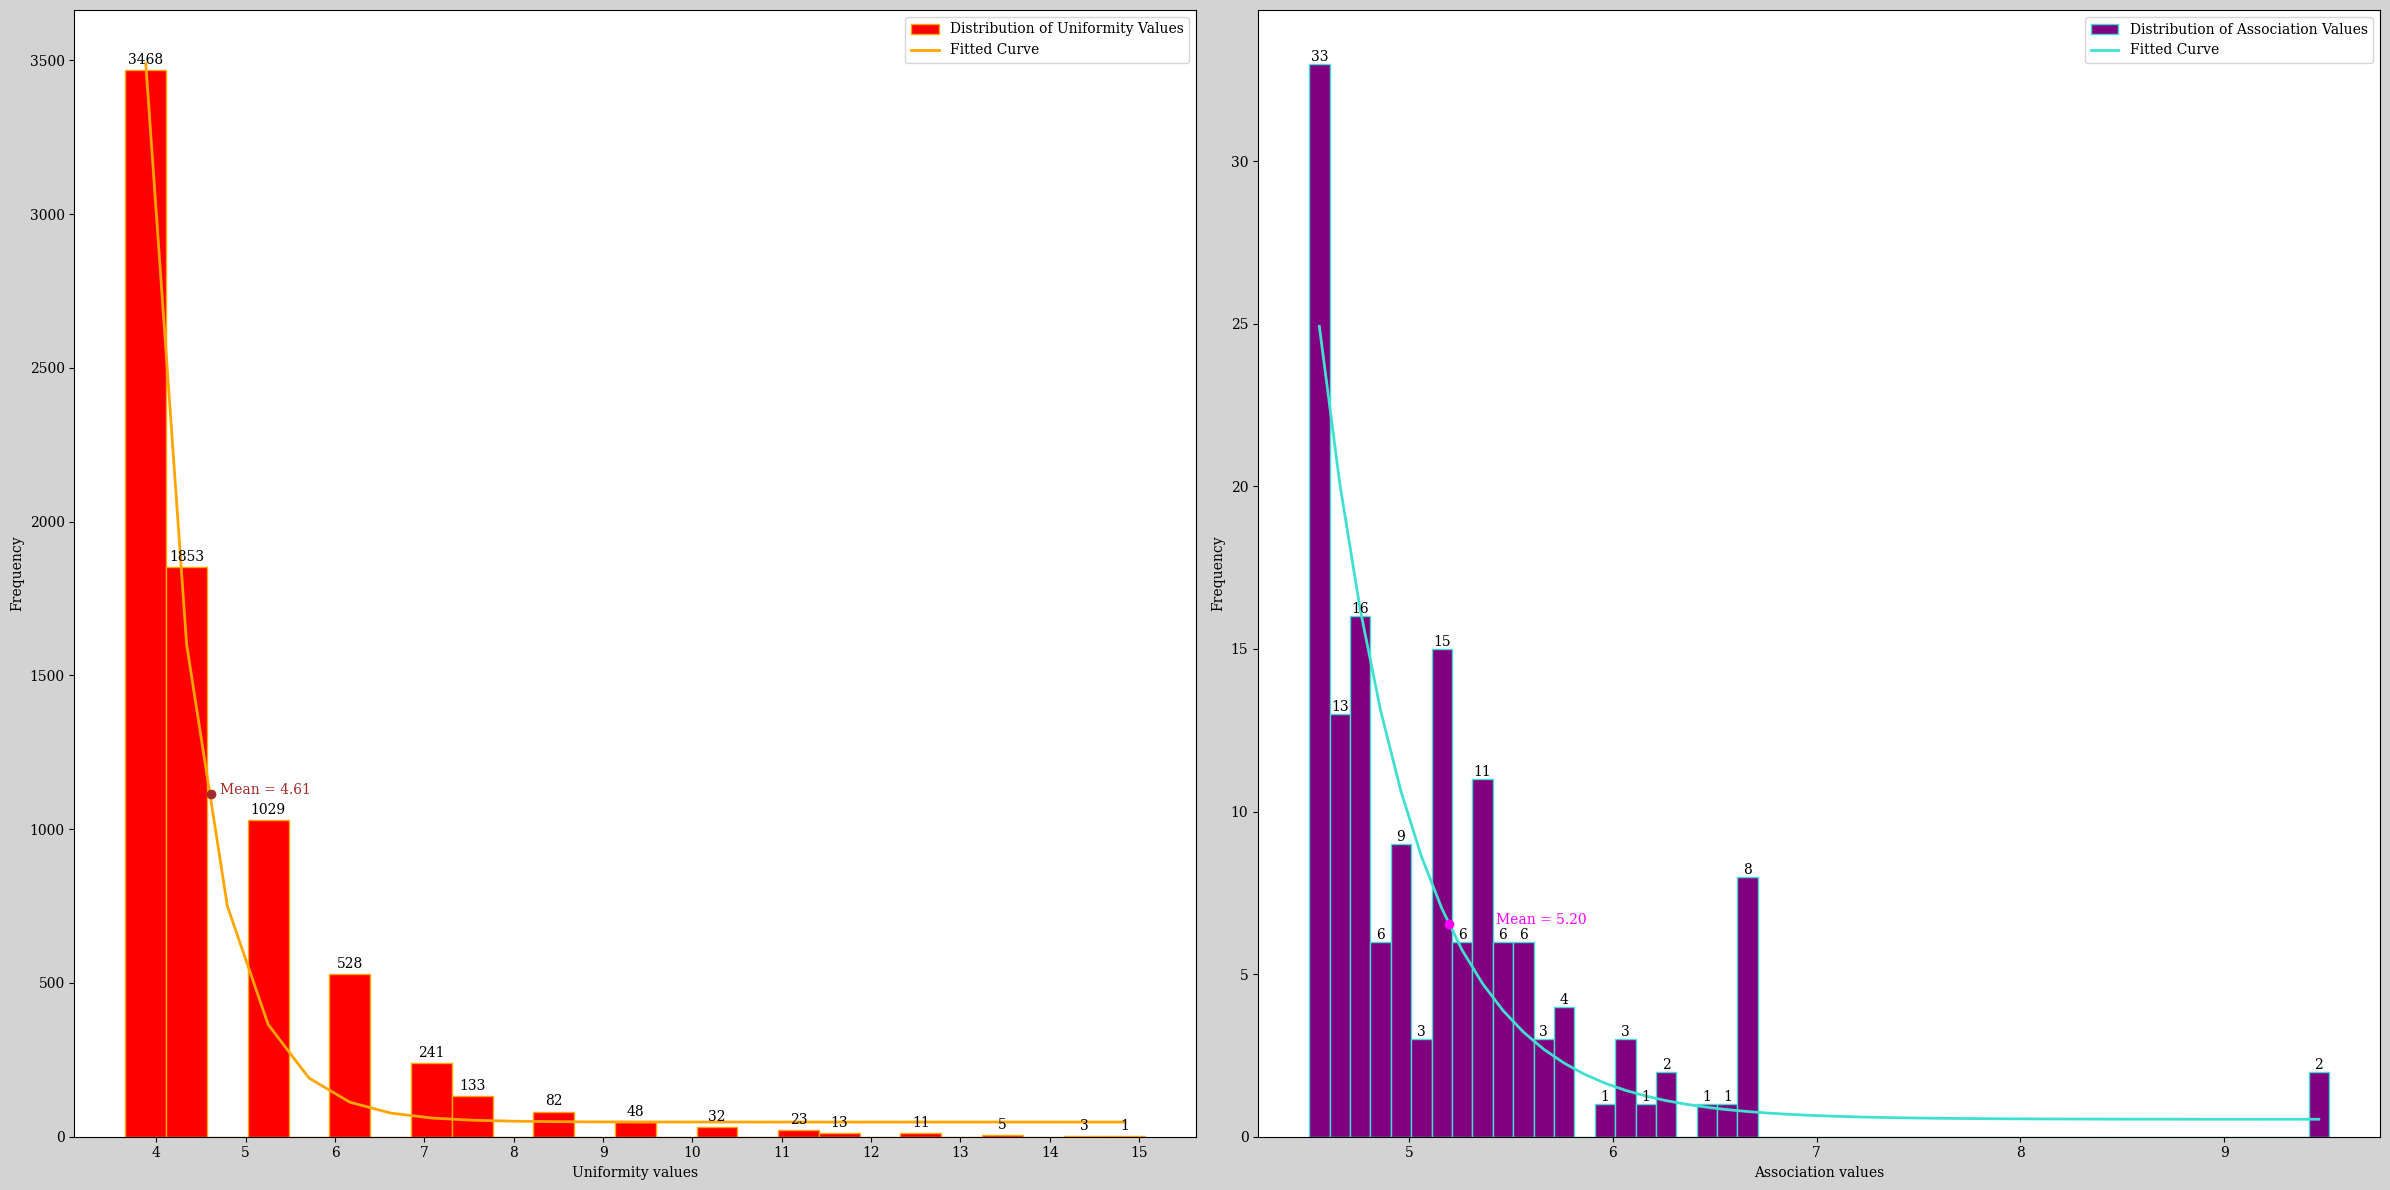

In [40]:
# Define an exponential decay function
def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c


# Set global font properties
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'font.weight': 'normal',
    'text.color': 'black'
})

########################################################################################################
# Create figure
fig = plt.figure(figsize=(24, 12))
fig.patch.set_facecolor('lightgrey')

# FIRST HISTOGRAM - UNIFORMITY
plt.subplot(1, 2, 1)
plt.gca().set_facecolor('white') # plt.gca() ret

# Plot the first histogram
counts, bins, patches = plt.hist(
    positive_values, 
    bins=25, 
    color='red', 
    edgecolor='orange',
    label='Distribution of Uniformity Values'
)

# Calculate the center of each bin
bin_centers = (bins[:-1] + bins[1:]) / 2 

# Fit an exponential decay model
popt, _ = curve_fit(
    exponential_decay,          # The exponential decay function
    bin_centers,                # x-values
    counts,                     # y-values
    p0=(max(counts), 0.015, 0), # Initial guess for the parameters (amplitude, decay rate, offset)
    maxfev=1000000              # Maximum number of function evaluations before stopping
) 

# Plot fitted curve
plt.plot(
    bin_centers,                             # x-values for the fitted curve
    exponential_decay(bin_centers, *popt),   # y-values for the fitted curve
    color='orange', 
    lw=2,                                    # Line width
    label='Fitted Curve'
)

# Plot axis values
plt.xlabel('Uniformity values')
min_bin = 3                                    # Minimum bin value (on x-axis)
max_bin = 15                                   # Maximum bin value (on x-axis)
plt.xticks(np.arange(min_bin, max_bin + 1, 1)) # Customizes the x-axis ticks, from 3 to 15 (+1 makes sure upper limit is included) with a step size of 1
plt.ylabel('Frequency')                        # Label for y-axis

# Annotate y-axis values on top of x values
for count, x in zip(counts, bins[:-1]):
    if count > 0:
        plt.text(
            x + (bins[1] - bins[0]) / 2, count + 10,
            f'{int(count)}', ha='center', va='bottom', fontsize=10, color='black'
        )

# Plot and label mean data point
mean = np.mean(positive_values) # Calculate the mean of the positive values for the uniformity data
plt.scatter(mean, 1115, color='brown', zorder=5) # Plot the mean data point 
plt.text(mean + 0.1, 1115, f'Mean = {mean:.2f}', color='brown', fontsize=10) # Label the mean data point

plt.legend()

########################################################################################################
# SECOND HISTOGRAM - ASSOCIATION
plt.subplot(1, 2, 2)
plt.gca().set_facecolor('white')

# Plot the second histogram
counts2, bins2, patches2 = plt.hist(
    positive_values2, 
    bins=50, 
    color='purple', 
    edgecolor='turquoise',
    label='Distribution of Association Values'
)

# Calculate the center of each bin
bin_centers2 = (bins2[:-1] + bins2[1:]) / 2

# Fit an exponential decay model
popt2, _ = curve_fit(
    exponential_decay, 
    bin_centers2, 
    counts2, 
    p0=(max(counts2), 0.015, 0), 
    maxfev=10000
)

# Plot fitted curve
plt.plot(
    bin_centers2, 
    exponential_decay(bin_centers2, *popt2),
    color='turquoise', 
    lw=2, 
    label='Fitted Curve'
)

# Plot axis values
plt.xlabel('Association values')
min_bin2 = 4
max_bin2 = 10
plt.xticks(np.arange(min_bin2, max_bin2 + 1, 1))
plt.ylabel('Frequency')

# Annotate y-axis values on top of x values
for count, x in zip(counts2, bins2[:-1]):
    if count > 0:
        plt.text(
            x + (bins2[1] - bins2[0]) / 2, count + 0,
            f'{int(count)}', ha='center', va='bottom', fontsize=10, color='black'
        )

# Plot and label mean
mean2 = np.mean(positive_values2)
plt.scatter(mean2, 6.55, color='magenta', zorder=5)
plt.text(mean2 + 0.23, 6.55, f'Mean = {mean2:.2f}', color='magenta', fontsize=10)

plt.legend()

########################################################################################################
# Show plot
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()


### **Plot histogram - Alternative 3 (an actual readable histogram)**

Make sure that since you spent so much time coding rather than studying for exams, you might as well blow the hairline of any mid-30s dude within a 1 mile radius so far back, that they become chronic baseball cap wearers. No matter the weather. 

The code below provides you with a histogram you can actually read, and understand how it correlates to the brain fMRI plots above. It builds on code provided above, but with additional adjustments, such as:
* Annotating the x-axis with 1 decimal floats based on the bin_centers values, and centering them underneath each respective bin

* `mColors.normalize` = A function of `matplotlib.colors` (mColors) that allows you to map a range of data values to a color range. Thus the data points will be colored based on their normalized values. It has two parameters, `vmin` (the lowest of the data you provide here will map to the lower end of the color scale) and `vmax`(the highest end of your data will map to the upper end of the color scale). 
  
* `cm.get_colormap` = A function of the `matplotlib.cm` moduel, used to retrieve a color map by name. 

* `cm.ScalarMappable` = A class used to map scalar data values to colors. It combines two things: a colormap (`cmap`) and normalization (`norm`) of data into a range compatible with the colormap.

* `sm.set_array([])` = sm refers to `ScalarMappable`, and the following function updates the array of data used by the `ScalarMappable` object. Passing an empty list [] resets the data array, and is typically used when it is for a colorbar. This is typically done when you simply want the colorbar to serve as a reference for the colormap and normalization. 

* `plt.colorbar` = A function in `Matplotlib` that adds a colorbar to the plot. 



/var/folders/yg/5st2rqtj1fj_p5lyc22p30d80000gn/T/ipykernel_37573/177797889.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('inferno')                              # Set the colormap to 'inferno'
/var/folders/yg/5st2rqtj1fj_p5lyc22p30d80000gn/T/ipykernel_37573/177797889.py:161: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap2 = cm.get_cmap('cool')
/var/folders/yg/5st2rqtj1fj_p5lyc22p30d80000gn/T/ipykernel_37573/177797889.py:202: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


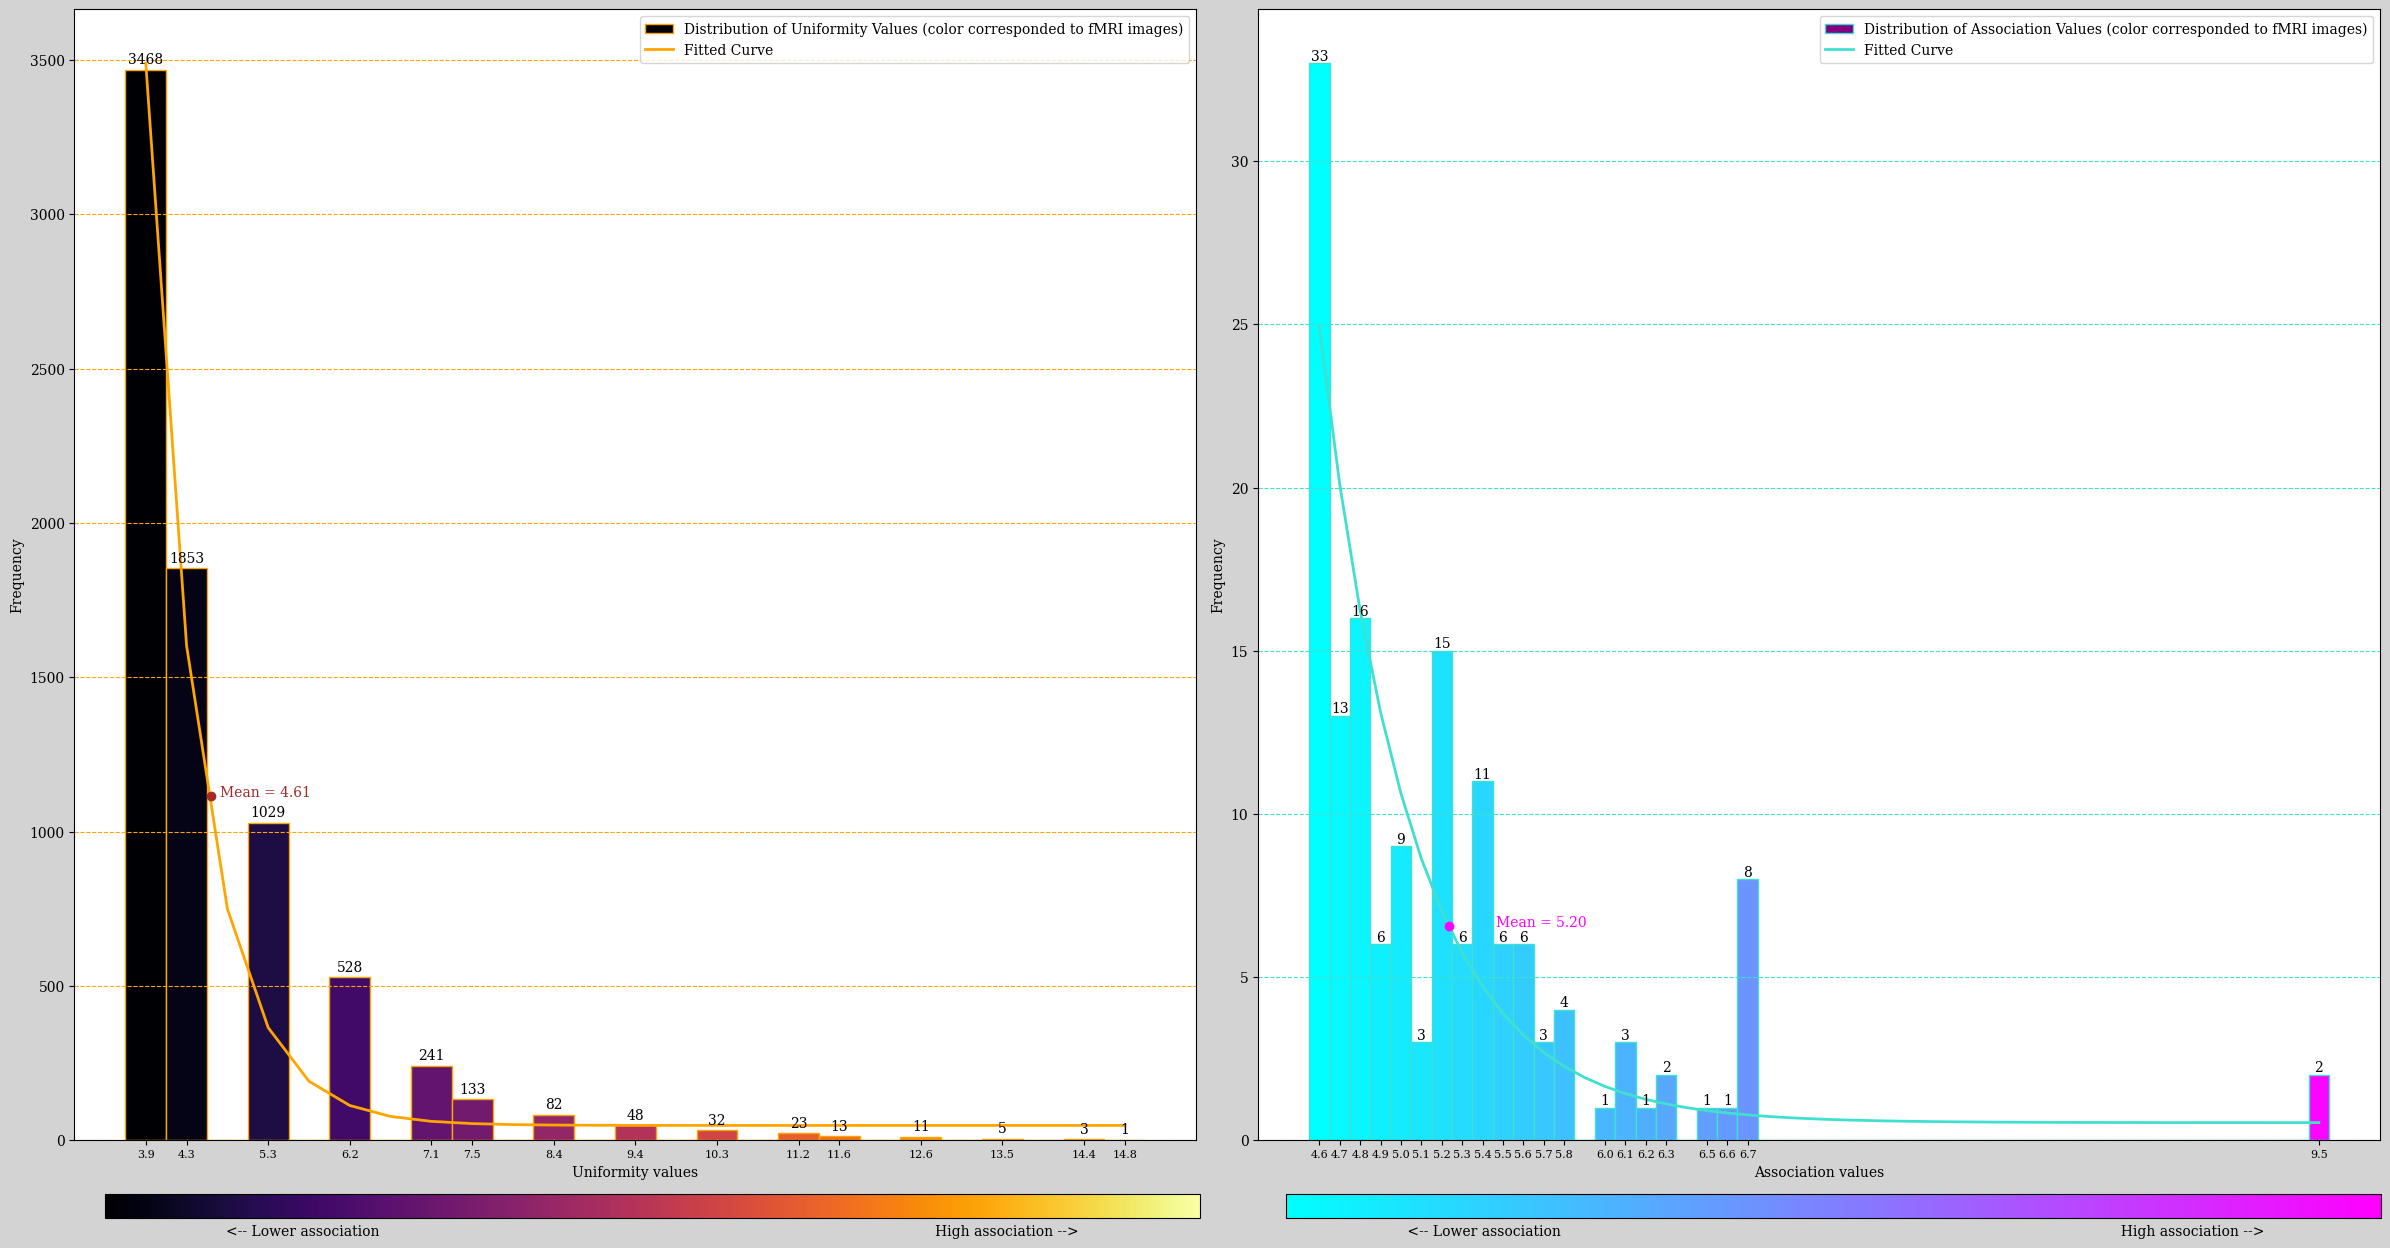

In [41]:
# Define an exponential decay function
def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Set global font properties
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'font.weight': 'normal',
    'text.color': 'black'
})

########################################################################################################
# Create figure
fig = plt.figure(figsize=(24, 12))
fig.patch.set_facecolor('lightgrey')

# FIRST HISTOGRAM - UNIFORMITY
plt.subplot(1, 2, 1)
plt.gca().set_facecolor('white')

# Plot the first histogram
counts, bins, patches = plt.hist(
    positive_values, 
    bins=25, 
    color='red', 
    edgecolor='orange',
    label='Distribution of Uniformity Values (color corresponded to fMRI images)'
)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Fit an exponential decay model
popt, _ = curve_fit(
    exponential_decay, 
    bin_centers, 
    counts, 
    p0=(max(counts), 0.015, 0), 
    maxfev=1000000
)

# Plot fitted curve
plt.plot(
    bin_centers, 
    exponential_decay(bin_centers, *popt),
    color='orange', 
    lw=2, 
    label='Fitted Curve'
)

# Plot axis values
plt.xlabel('Uniformity values')
non_zero_centers = bin_centers[counts > 0]  # Extract non-zero bin centers
plt.xticks(
    non_zero_centers,                                        # Set the x-axis ticks to the non-zero bin centers
    labels=[f"{center:.1f}" for center in non_zero_centers], # Format the x-axis labels to one decimal place
    size=8                                                   # Set the font size of the x-axis labels
)

plt.grid(axis='y', color='orange', linestyle='--')
plt.ylabel('Frequency')

# Annotate y-axis values on top of x values
for count, x in zip(counts, bins[:-1]):
    if count > 0: # Only annotate if the count is greater than 0
        plt.text(
            x + (bins[1] - bins[0]) / 2, count + 10,
            f'{int(count)}', ha='center', va='bottom', fontsize=10, color='black'
        )

# Plot and label mean
mean = np.mean(positive_values)
plt.scatter(mean, 1115, color='brown', zorder=5)
plt.text(
    mean + 0.1, # x-coordinate for the text, slightly to the right of the mean point (+ 0.1)
    1115,       # y-coordinate for the text
    f'Mean = {mean:.2f}', 
    color='brown', 
    fontsize=10
    )

# Normalize the counts for a colormap
norm = mcolors.Normalize(vmin=min(bins), vmax=max(bins))   # Normalize the values in the bins to a colormap
cmap = cm.get_cmap('inferno')                              # Set the colormap to 'inferno'

# Define a function to get the color for each bin based on count
def get_color_for_bin(bin):
    return cmap(norm(bin)) # Return the color based on the normalized bin values

# Apply the colors to each histogram patch (bar)
for patch, bin in zip(patches, bins):
    patch.set_facecolor(get_color_for_bin(bin)) 

plt.legend()

########################################################################################################
# SECOND HISTOGRAM - ASSOCIATION
plt.subplot(1, 2, 2)
plt.gca().set_facecolor('white')

# Plot the second histogram
counts2, bins2, patches2 = plt.hist(
    positive_values2, 
    bins=50, 
    color='purple', 
    edgecolor='turquoise',
    label='Distribution of Association Values (color corresponded to fMRI images)'
)
bin_centers2 = (bins2[:-1] + bins2[1:]) / 2

# Fit an exponential decay model
popt2, _ = curve_fit(
    exponential_decay, 
    bin_centers2, 
    counts2, 
    p0=(max(counts2), 0.015, 0), 
    maxfev=10000
)

# Plot fitted curve
plt.plot(
    bin_centers2, 
    exponential_decay(bin_centers2, *popt2),
    color='turquoise', 
    lw=2, 
    label='Fitted Curve'
)

# Plot axis values
plt.xlabel('Association values')
non_zero_centers2 = bin_centers2[counts2 > 0]
plt.xticks(
    non_zero_centers2, 
    labels=[f"{center:.1f}" for center in non_zero_centers2], 
    size=8
)
plt.ylabel('Frequency')

# Annotate y-axis values on top of x values
for count, x in zip(counts2, bins2[:-1]):
    if count > 0: # Only annotate if the count is greater than 0
        plt.text(
            x + (bins2[1] - bins2[0]) / 2, count + 0,
            f'{int(count)}', ha='center', va='bottom', fontsize=10, color='black'
        )

# Plot and label mean
mean2 = np.mean(positive_values2)
plt.scatter(mean2, 6.55, color='magenta', zorder=5)
plt.text(
    mean2 + 0.23, # x-coordinate for the text, slightly to the right of the mean point (+ 0.23)
    6.55,         # y-coordinate for the text
    f'Mean = {mean2:.2f}', 
    color='magenta', 
    fontsize=10)
plt.grid(axis='y', color='turquoise', linestyle='--')

plt.legend()

# Normalize the counts for a colormap
norm2 = mcolors.Normalize(vmin=min(bins2), vmax=max(bins2))
cmap2 = cm.get_cmap('cool')

# Define a function to get the color based on count
def get_color_for_bins2(bin):
    return cmap2(norm2(bin))

# Apply the colors to each histogram patch (bar)
for patch, bin in zip(patches2, bins2):
    patch.set_facecolor(get_color_for_bins2(bin))

########################################################################################################
# COLORBARS

# First colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)           # Create a ScalarMappable object with the colormap and normalization
sm.set_array([])                                       # Set the array to an empty list, so we only get the colormap for reference
fig = plt.gcf()                                        # Get the current figure (gcf)
cbar_axes = fig.add_axes([0.046, -0.02, 0.456, 0.02])  # Add axes for the colorbar at the bottom of the plot
cbar = plt.colorbar(
    sm, 
    cax=cbar_axes,        # Add the colorbar to the specified axes
    orientation='horizontal',
    label='<-- Lower association                                                                                                                               High association -->'
)
cbar.set_ticks([])        # Remove the ticks from the colorbar ([])

# Second colorbar
sm2 = cm.ScalarMappable(cmap=cmap2, norm=norm2)
sm2.set_array([])
fig2 = plt.gcf()
cbar_axes2 = fig2.add_axes([0.538, -0.02, 0.456, 0.02])
cbar2 = plt.colorbar(
    sm2, 
    cax=cbar_axes2, 
    orientation='horizontal',
    label=' <-- Lower association                                                                                                                                High association -->'
)
cbar2.set_ticks([])

########################################################################################################
# Show plot
plt.tight_layout()
plt.show()
